### RED VS White


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#file to load
wine_data = "Resources/wine_data.csv"
wine_df = pd.read_csv(wine_data)
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
2,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
3,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
4,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


## Average Price of a Bottle of Wine in our Dataset

In [12]:
mean_price = wine_df["price"].mean()
print(f"The average price of a bottle of wine in our Dataset is ${round(mean_price, 2)}")

The average price of a bottle of wine in our Dataset is $35.36


## Representation Matters

In [17]:
country_count = wine_df["country"].nunique()
province_count = wine_df["province"].nunique()
winery_count = wine_df["winery"].nunique()

print(f"Our dataset represents {country_count} countries, {province_count} provinces, and {winery_count} wineries.")

Our dataset represents 42 countries, 422 provinces, and 15855 wineries


## Average Point Value

In [82]:
avg_point_value = wine_df["points"].mean()
print(f"The average point value of a bottle of wine in our dataset is {round(avg_point_value, 2)} points. ")


The average point value of a bottle of wine in our dataset is 88.42 points. 


#### Wine Points
* The magazine that published this dataset uses a 100 point system for classifying wines in a review. 

60-69. Wines are flawed and not recommended

70-79 Wines are flawed and taste average

80-84 wines are above average to good

85-90 wines are good to very good

90-94 wines are superior to exceptional

95-100. Wines are benchmark examples or classic



In [125]:
wine_df["points"].min()

80

#### There are no wines in our dataset that are below an 80 on the point scale

In [106]:
#Analyzing wine score
point_df = wine_df[["Unnamed: 0", "points"]]
rating = []
for row in point_df["points"]:
    if row >=95:
        rating.append("Classic")
    elif row > 90 : 
        rating.append("Exceptional")
    elif row >= 85 :
        rating.append("Very Good")
    elif row >= 80 :
        rating.append("Good")
    else:
        rating.append("Flawed wine, don't waste your time")
    
    

point_df["rating"] = rating

point_df.head()

            
    


C:\Users\Erin.Ford\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Unnamed: 0,points,rating
0,1,87,Very Good
1,2,87,Very Good
2,3,87,Very Good
3,4,87,Very Good
4,5,87,Very Good


Text(0.5,1,'Percentage of Dataset by Rating')

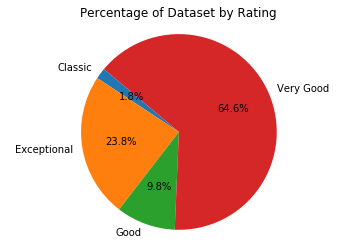

In [143]:
#Plotting ratings on a pie chart
rating_pie=point_df.groupby(["rating"]).points.count()
labels=("Classic", "Exceptional", "Good", "Very Good")

plt.pie(rating_pie, labels=labels, autopct ="%1.1f%%", startangle=140)
plt.axis("equal")
plt.title("Percentage of Dataset by Rating")


## Price vs Rating

In [142]:
#adding my previous "rating" column to our main df
wine_df["rating"]= rating
#making df smaller, more manageable
price_wine_df=wine_df[["Unnamed: 0", "price","points", "rating"]]
#Getting my numbers
mean_price_by_rating=round(price_wine_df.groupby(["rating"]).price.mean(),2)
min_price_by_rating =round(price_wine_df.groupby(["rating"]).price.min(),2)
max_price_by_rating = round(price_wine_df.groupby(["rating"]).price.max(), 2)

price_vs_rating_numbers =pd.DataFrame ({"Average Price" : mean_price_by_rating,
                                       "Cheapest bottle" : min_price_by_rating,
                                       "Most expensive bottle" : max_price_by_rating
                                       })
price_vs_rating_numbers["Average Price"] =price_vs_rating_numbers["Average Price"].map("${:.2f}".format)
price_vs_rating_numbers["Cheapest bottle"] =price_vs_rating_numbers["Cheapest bottle"].map("${:.2f}".format)
price_vs_rating_numbers["Most expensive bottle"] =price_vs_rating_numbers["Most expensive bottle"].map("${:.2f}".format)
price_vs_rating_numbers

,Average Price,Cheapest bottle,Most expensive bottle
rating,,,
Classic,$139.02,$20.00,$2500.00
Exceptional,$54.30,$7.00,$2013.00
Good,$18.76,$4.00,$225.00
Very Good,$27.96,$4.00,$3300.00


## Top 10 Countries Represented 

In [74]:
top_countries= wine_df.groupby("country").count()
top_countries_df= top_countries.rename(columns={"Unnamed: 0": "Number of Wines in Dataset"})

sorted_countries= top_countries_df[["Number of Wines in Dataset"]]
top_10_countries =sorted_countries.sort_values("Number of Wines in Dataset", ascending= False).head(10)
top_10_countries

,Number of Wines in Dataset
country,
US,54265
France,17776
Italy,16914
Spain,6573
Portugal,4875
Chile,4416
Argentina,3756
Austria,2799
Australia,2294


Text(0,0.5,'Number of Wines')

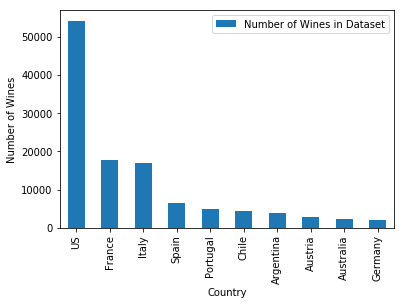

In [79]:
top_10_countries.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Number of Wines")


TypeError: string indices must be integers